# Importing Libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from scipy.stats import probplot

# Importing the dataset

In [35]:
data = pd.read_csv('avocado.csv')
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [36]:
data.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

# Data Cleaning

**Dropping unwanted columns**

The first column has no name and its just indexing.So it can be dropped. 'Total Volume' and 'Total Bags' are the sum of varaints and sizes respectively. They also not actual sum of the columns. So it can be dropped


In [37]:
data=data.drop(data.columns[0],axis=1)
data=data.drop(columns=['Total Volume','Total Bags'],axis=1)
data.head()

,Date,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015,Albany


**Checking for missing values**

In [38]:
missing=data.isna().sum()
print(missing)

Date            0
AveragePrice    0
4046            0
4225            0
4770            0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


There is no missing values

**Percentage of Missing Values in each column**

In [40]:
total=data.shape[0]
missing_percentage = (missing/total) * 100
print("\n\nPercentage of missing values in each column:")
print(missing_percentage)

<class 'pandas.core.series.Series'>


Percentage of missing values in each column:
Date            0.0
AveragePrice    0.0
4046            0.0
4225            0.0
4770            0.0
Small Bags      0.0
Large Bags      0.0
XLarge Bags     0.0
type            0.0
year            0.0
region          0.0
dtype: float64


# Categorical and Numerical features available in the dataset

In [7]:
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
numerical_features = data.select_dtypes(exclude=['object']).columns.tolist()
print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['Date', 'type', 'region']
Numerical Features: ['AveragePrice', '4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']


#Exploratory Data Analysis

**#1 What is the maximum average price value of the avocados?**

Max Avg Price Value:  3.25


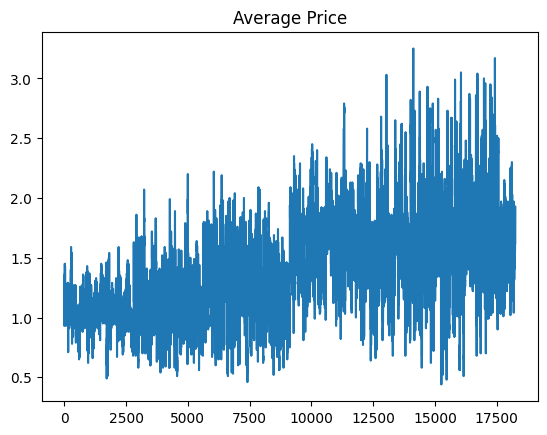

In [8]:
plt.title("Average Price")
plt.plot(data["AveragePrice"])
max_average_price = data['AveragePrice'].max()
print("Max Avg Price Value: " , max_average_price)
plt.show()

**#2 Which region has the highest value of the average price of avocado?**

Max Price in Region:  SanFrancisco


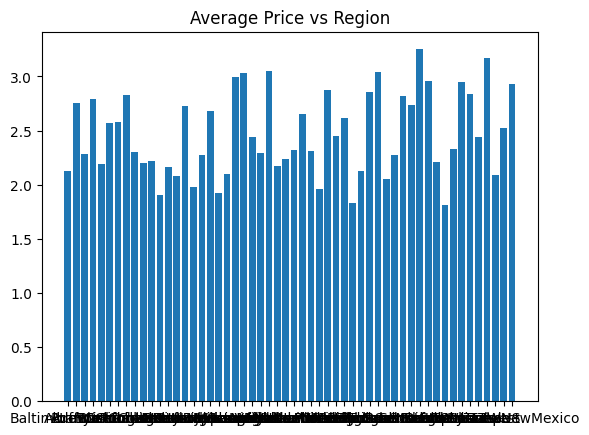

In [9]:
plt.title("Average Price vs Region")
plt.bar(data['region'],data['AveragePrice'])
max_price_region = data.loc[data['AveragePrice'].idxmax(),'region']
print("Max Price in Region: ",max_price_region)
plt.show()

**#3 Which year has sold most small bags?**

Year:  2018


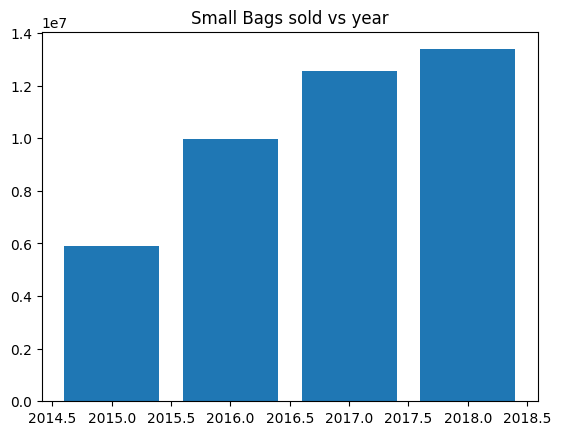

In [10]:
plt.title("Small Bags sold vs year")
plt.bar(data['year'],data['Small Bags'])
max_price_year = data.loc[data['Small Bags'].idxmax(),'year']
print("Year: ",max_price_year)
plt.show()

**#4 Which day has the highest value of average price of avocado?**

Max Price on a Day:  2016-10-30


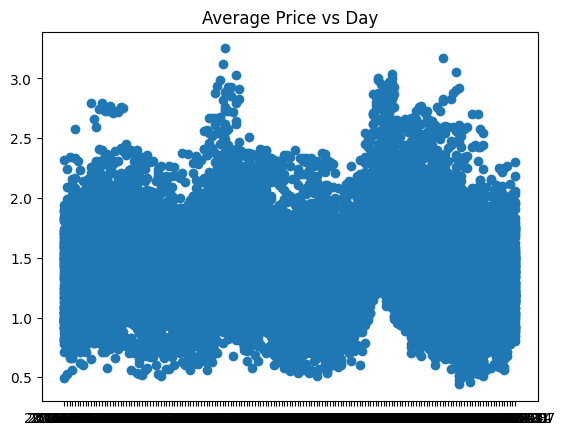

In [11]:
plt.title("Average Price vs Day")
plt.scatter(data['Date'],data['AveragePrice'])
max_price_year = data.loc[data['AveragePrice'].idxmax(),'Date']
print("Max Price on a Day: ",max_price_year)
plt.show()

**#5 Is there a correlation between the size of bags (Small Bags, Large Bags, XLarge Bags) and the average price of avocados?**

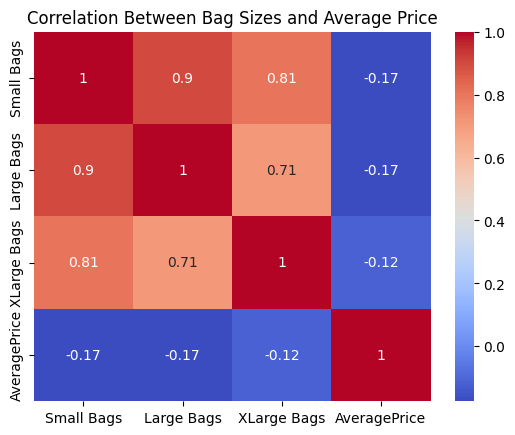

In [12]:
sns.heatmap(data[['Small Bags', 'Large Bags', 'XLarge Bags', 'AveragePrice']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Bag Sizes and Average Price')
plt.show()

Inference:

Postive value: Size increses, Average Price increases

Negative value: Size increases, Average Price decreases

# Handling Categorical Values

In [13]:
data['type'].unique()

array(['conventional', 'organic'], dtype=object)

Using Label encoding for column 'type' since it has only 2 types

In [14]:
data['type'] = LabelEncoder().fit_transform(data['type'])
data.head()

,Date,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015,Albany
1,2015-12-20,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015,Albany
2,2015-12-13,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015,Albany
3,2015-12-06,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015,Albany
4,2015-11-29,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015,Albany


Converting Date to epoch

In [15]:
data['Date'] = pd.to_datetime(data['Date']).astype('int64')
data['Date'].head()

0    1451174400000000000
1    1450569600000000000
2    1449964800000000000
3    1449360000000000000
4    1448755200000000000
Name: Date, dtype: int64

In [16]:
data['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

Using One-hot encoding for column 'region'

In [17]:
data = pd.get_dummies(data,columns = ['region'])
data.head()

,Date,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1451174400000000000,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015,...,False,False,False,False,False,False,False,False,False,False
1,1450569600000000000,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015,...,False,False,False,False,False,False,False,False,False,False
2,1449964800000000000,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015,...,False,False,False,False,False,False,False,False,False,False
3,1449360000000000000,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015,...,False,False,False,False,False,False,False,False,False,False
4,1448755200000000000,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015,...,False,False,False,False,False,False,False,False,False,False


# Handling Outliers

**Handling Outliers**

Removing the outliers which are greater than upper bound and lesser than lower bound

In [18]:
data.shape

(18249, 64)

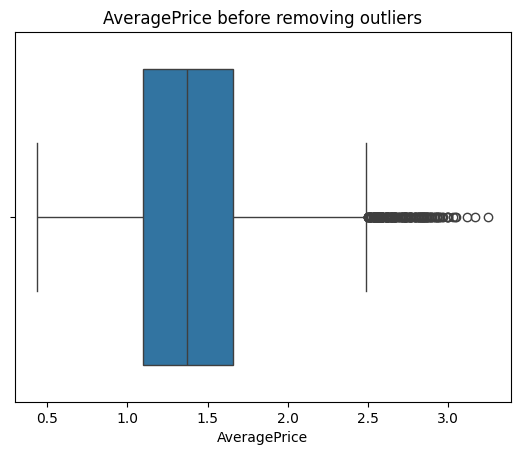

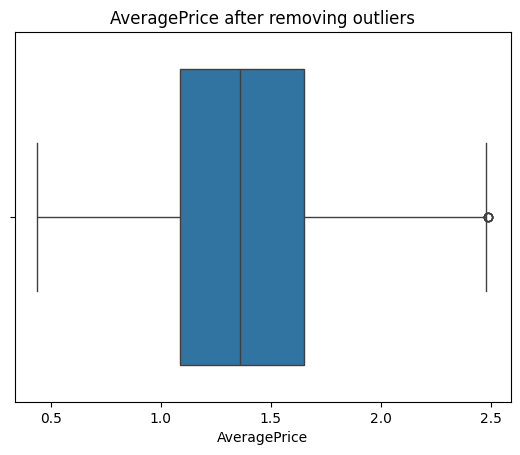

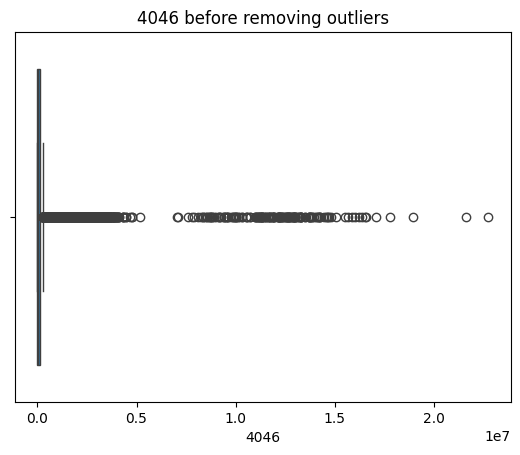

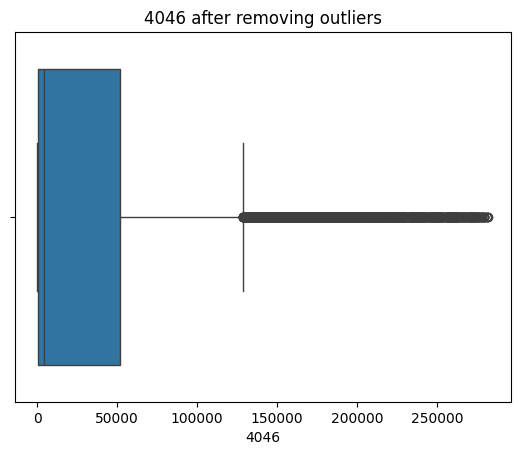

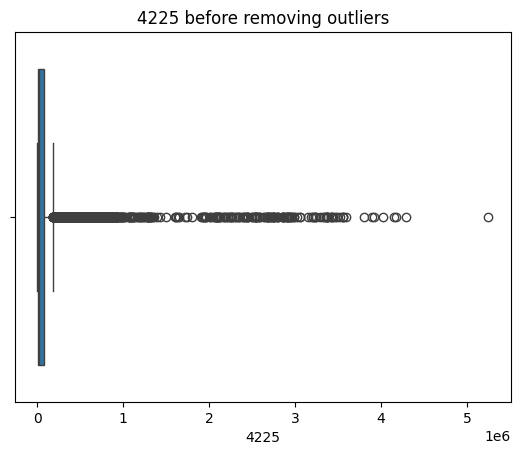

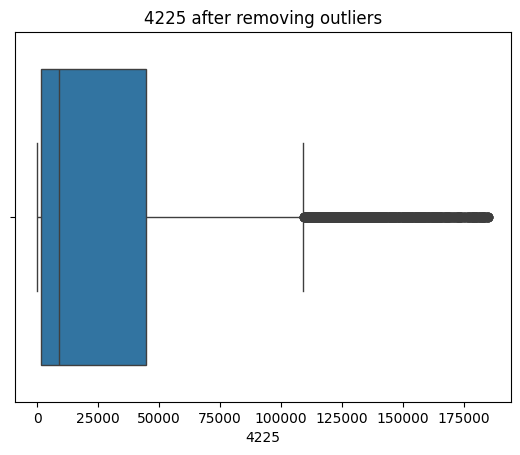

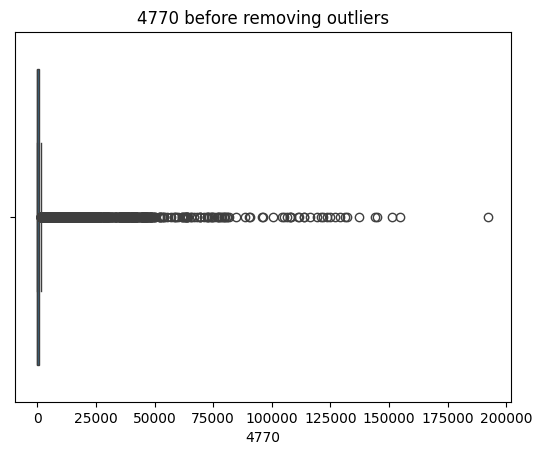

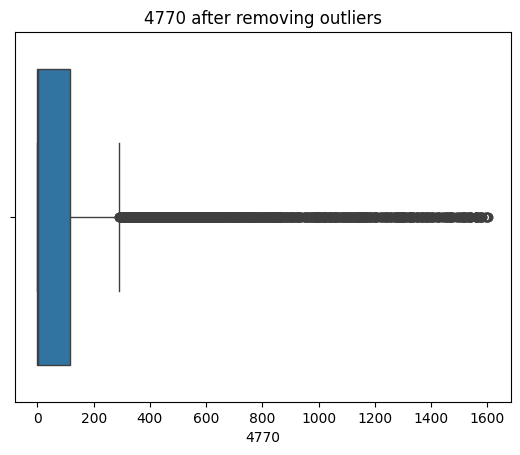

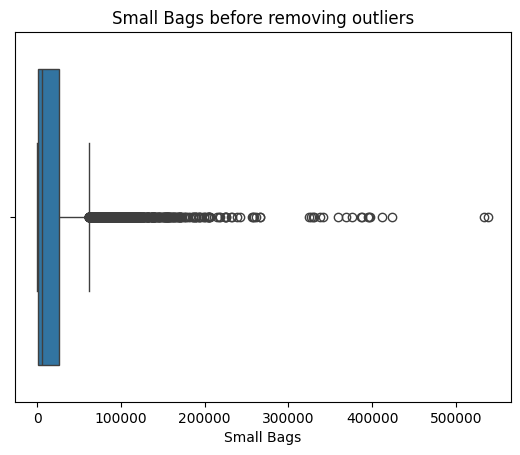

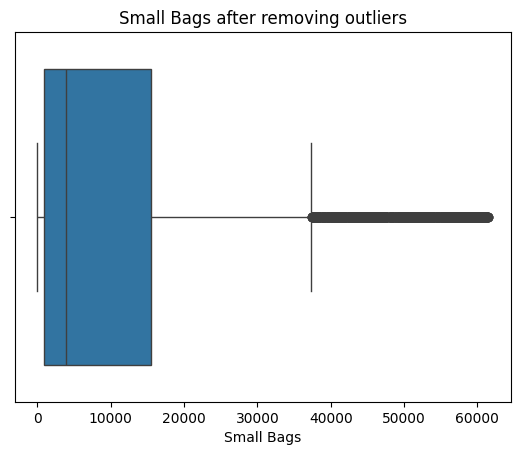

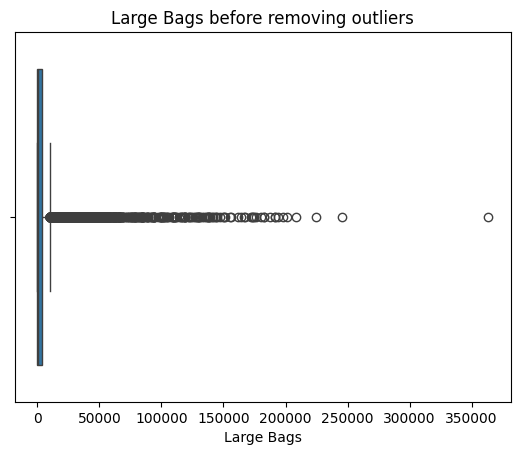

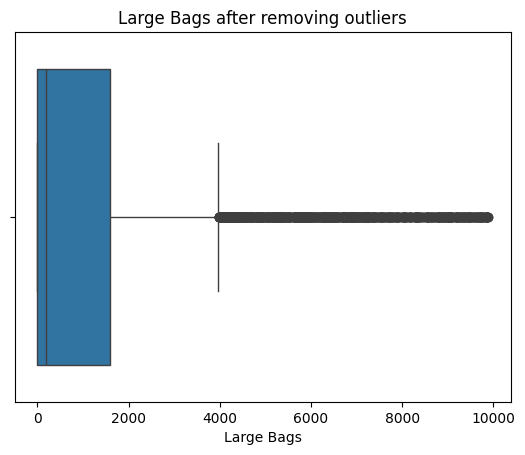

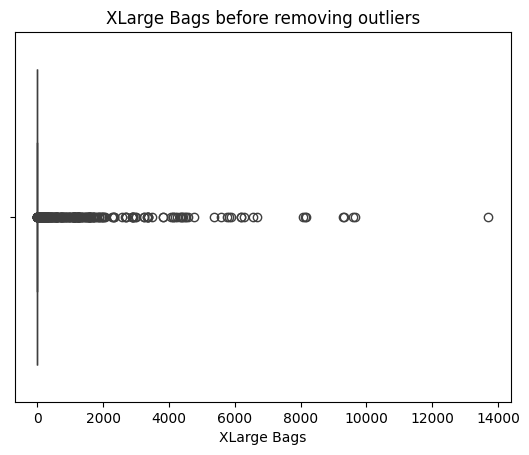

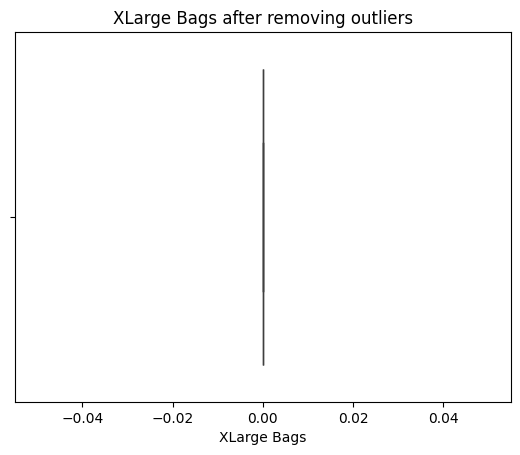

In [19]:
numerical_features.remove('year')
for col in numerical_features:
  sns.boxplot(x=data[col])
  plt.title(col+" before removing outliers")
  plt.show()
  data[col].describe()
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  data.drop(data[(data[col] < lower_bound) | (data[col] > upper_bound)].index, inplace=True)
  plt.title(col+" after removing outliers")
  sns.boxplot(x=data[col])
  plt.show()


In [20]:
data.shape

(7878, 64)

# Distribution of features

**Distribution of each feature**

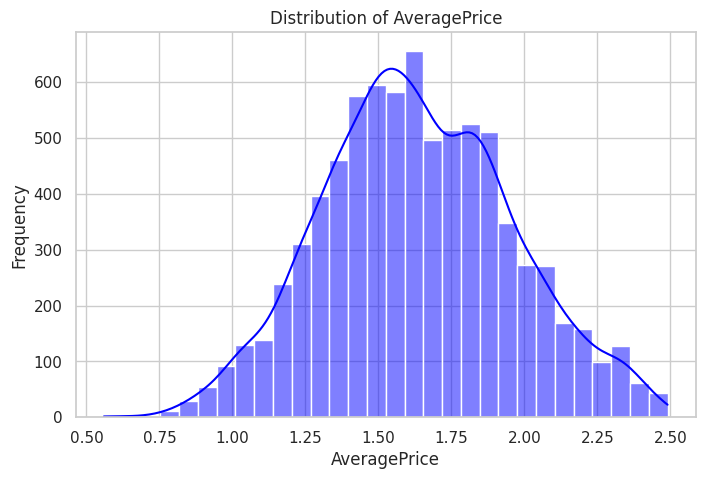

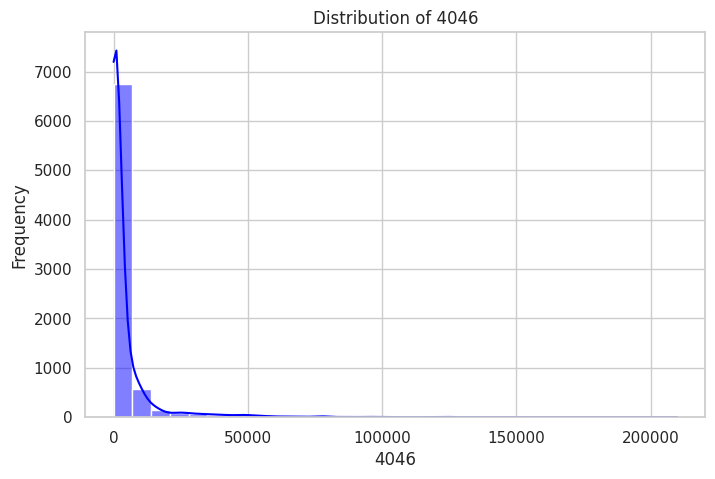

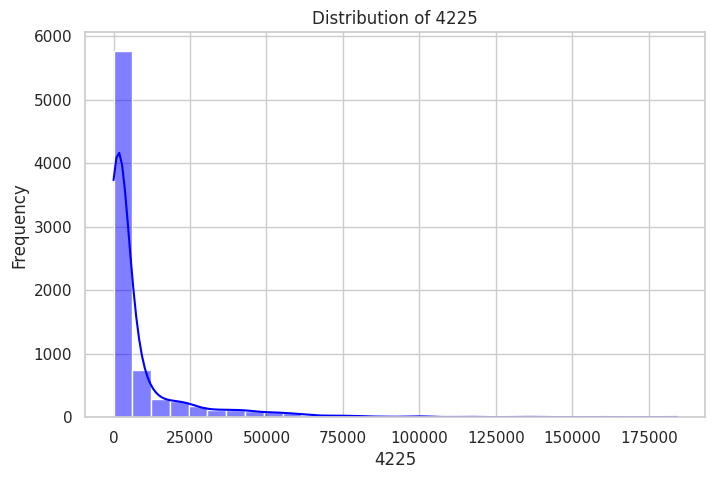

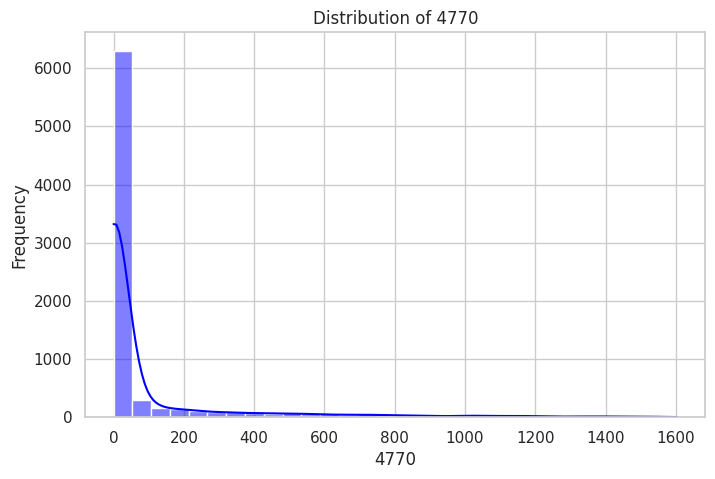

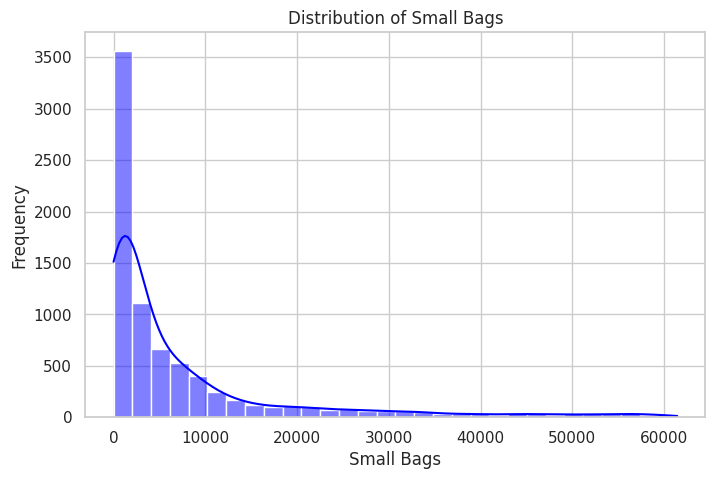

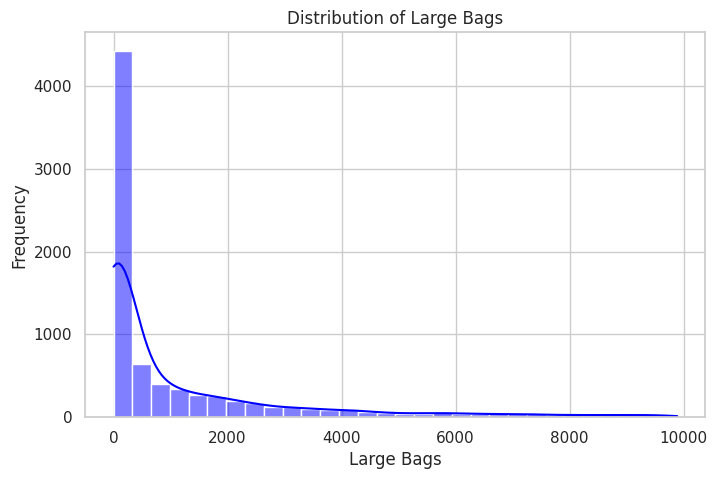

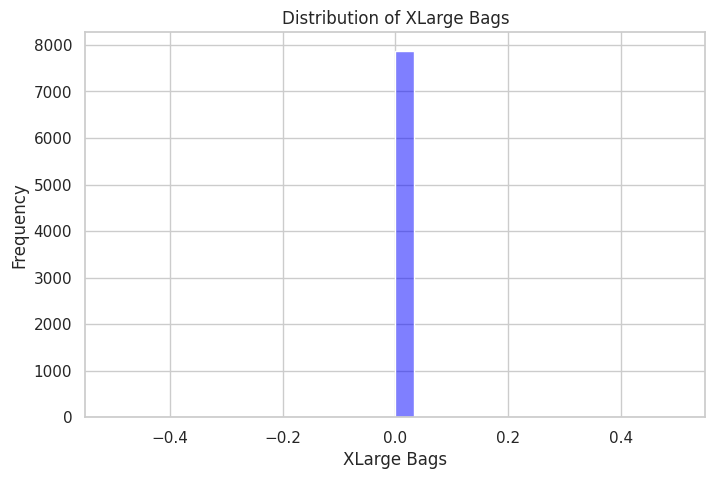

In [21]:
sns.set(style="whitegrid")
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[feature], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

**Infering the distribution of each feature using Q-Q plot**

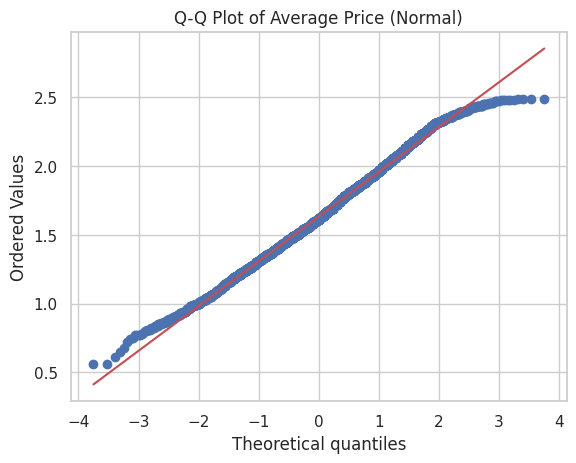

In [22]:
probplot(data['AveragePrice'], dist='norm', plot=plt)
plt.title('Q-Q Plot of Average Price (Normal)')
plt.show()

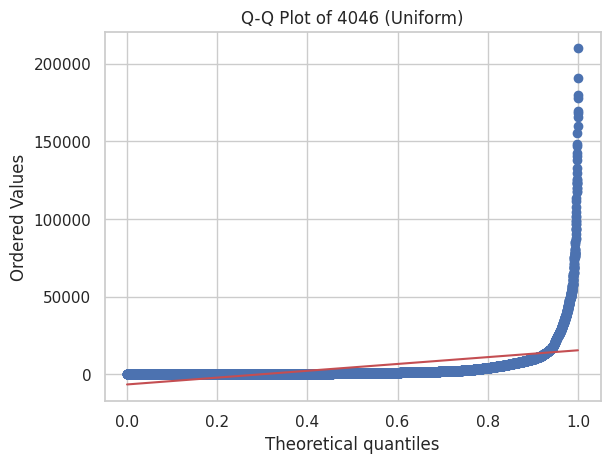

In [23]:
probplot(data['4046'], dist='uniform', plot=plt)
plt.title('Q-Q Plot of 4046 (Uniform)')
plt.show()

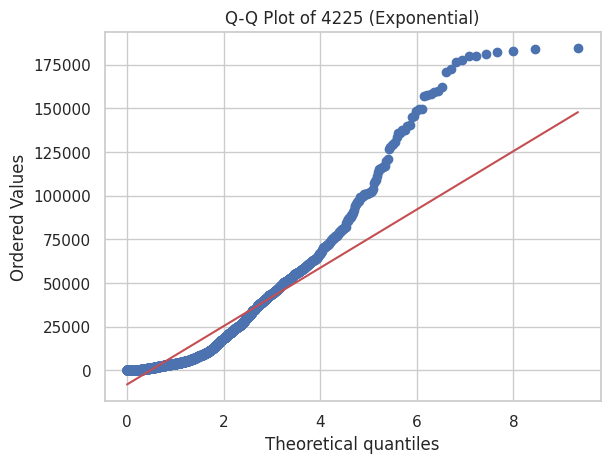

In [24]:
probplot(data['4225'], dist='expon', plot=plt)
plt.title('Q-Q Plot of 4225 (Exponential)')
plt.show()

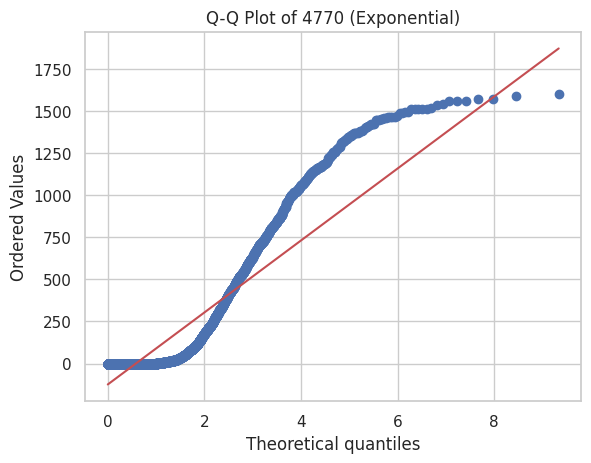

In [25]:
probplot(data['4770'], dist='expon', plot=plt)
plt.title('Q-Q Plot of 4770 (Exponential)')
plt.show()

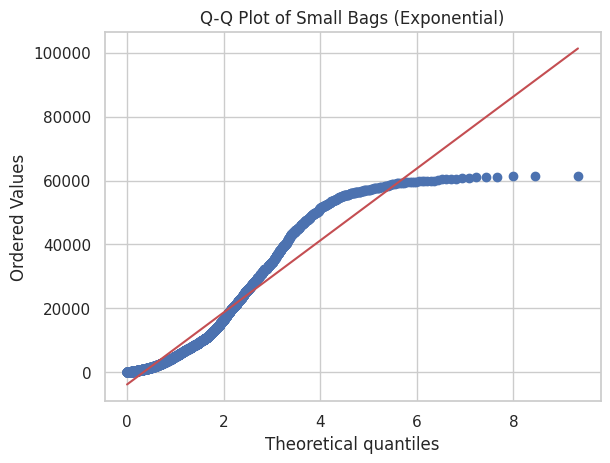

In [26]:
probplot(data['Small Bags'], dist='expon', plot=plt)
plt.title('Q-Q Plot of Small Bags (Exponential)')
plt.show()

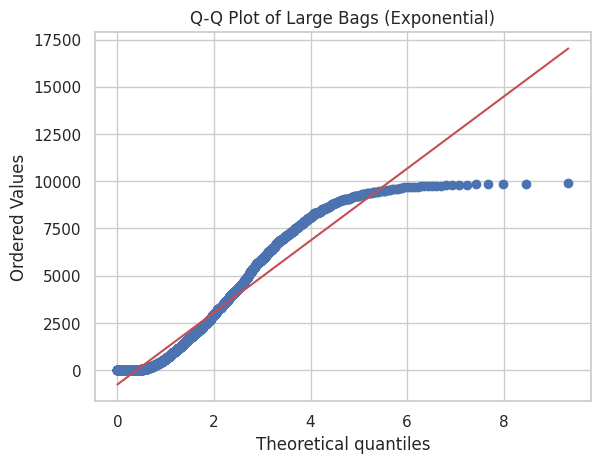

In [27]:
probplot(data['Large Bags'], dist='expon', plot=plt)
plt.title('Q-Q Plot of Large Bags (Exponential)')
plt.show()

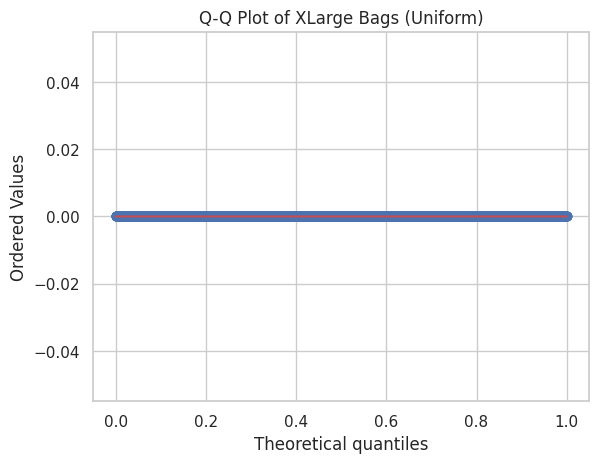

In [28]:
probplot(data['XLarge Bags'], dist='uniform', plot=plt)
plt.title('Q-Q Plot of XLarge Bags (Uniform)')
plt.show()

# Splitting the dataset and Feature Scaling

**Splitting the dataset**

In [29]:
X = data.drop(columns=['AveragePrice'],axis=1)
Y = data['AveragePrice']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

**Feature Scaling**

Normalization

In [30]:
norm = Normalizer()
X_train_normal = norm.fit_transform(X_train)
X_test_normal = norm.fit_transform(X_test)
X_train=pd.DataFrame(X_train)
print(X_train.describe())

               Date           4046           4225         4770    Small Bags  \
count  6.302000e+03    6302.000000    6302.000000  6302.000000   6302.000000   
mean   1.468400e+18    4574.243510    8772.617053    90.470709   7542.114508   
std    3.001663e+16   13601.610469   17955.265808   242.478748  11684.849277   
min    1.420330e+18       0.000000       0.000000     0.000000      0.000000   
25%    1.442102e+18     126.527500     481.572500     0.000000    773.785000   
50%    1.466294e+18     707.295000    2535.060000     0.000000   2663.465000   
75%    1.494115e+18    2671.512500    7069.372500    19.252500   8501.832500   
max    1.521936e+18  209893.280000  184277.870000  1603.540000  61430.730000   

        Large Bags  XLarge Bags         type         year  
count  6302.000000       6302.0  6302.000000  6302.000000  
mean   1158.837160          0.0     0.931133  2016.055855  
std    1976.653249          0.0     0.253248     0.947297  
min       0.000000          0.0     0.0

In [31]:
X_train_normal=pd.DataFrame(X_train_normal)
print(X_train_normal.describe())

           0             1             2             3             4   \
count  6302.0  6.302000e+03  6.302000e+03  6.302000e+03  6.302000e+03   
mean      1.0  3.143534e-15  5.992214e-15  6.206432e-17  5.105544e-15   
std       0.0  9.440041e-15  1.225998e-14  1.667152e-16  7.907657e-15   
min       1.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%       1.0  8.530297e-17  3.244176e-16  0.000000e+00  5.309532e-16   
50%       1.0  4.802623e-16  1.730779e-15  0.000000e+00  1.812400e-15   
75%       1.0  1.824979e-15  4.820708e-15  1.317768e-17  5.763236e-15   
max       1.0  1.475266e-13  1.290834e-13  1.099534e-15  4.312403e-14   

                 5       6             7             8             9   ...  \
count  6.302000e+03  6302.0  6.302000e+03  6.302000e+03  6.302000e+03  ...   
mean   7.867533e-16     0.0  6.341068e-19  1.373521e-15  2.312872e-20  ...   
std    1.342360e-15     0.0  1.729825e-19  2.740735e-17  1.233982e-19  ...   
min    0.000000e+00     0.0  0

# Writing to csv

**Writing to csv**

In [32]:
X_train.to_csv("train.csv")
X_test=pd.DataFrame(X_test)
X_test.to_csv("test.csv")